Tutorial note.  A collection of useful examples of using Pyplot can be found on [Matplotlib's Pyplot Tutorials Page.](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

# Plotting in Matplotlib

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.        ]
[2 2 8 0 8 1 2 7 4 8]


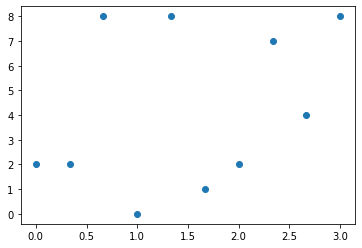

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice

R = range(10)
X = np.linspace(0, 3, 10)
Y = np.array([choice(R) for i in R])
print(X)
print(Y)
plt.scatter(X, Y)

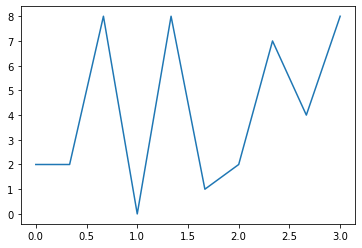

In [34]:
plt.plot(X, Y)

### Axis scaling

In some cases axes will be scaled identically.  For example

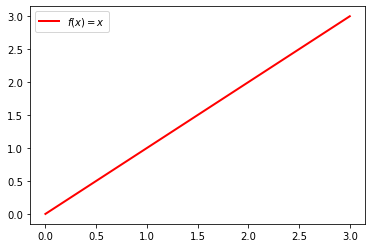

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(X, X, c = 'r', lw = 2., label = r'$f(x)=x$')
plt.legend()

In most cases, axes are scaled to fit all the data with a little margin, meaning in general, the X and Y axes will be scaled differently.  For example:

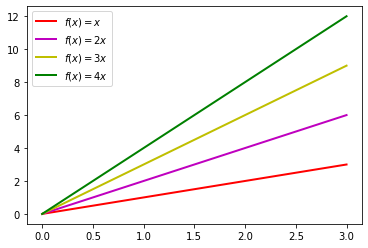

In [38]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 3, 1024)

plt.plot(X, X, c = 'r', lw = 2., label = r'$f(x)=x$')
plt.plot(X, 2*X, c = 'm', lw = 2., label = r'$f(x)=2x$')
plt.plot(X, 3*X, c = 'y', lw = 2., label = r'$f(x)=3x$')
plt.plot(X, 4*X, c = 'g', lw = 2., label = r'$f(x)=4x$')
plt.legend()

The X and Y axes are scaled differently because the Y axis must fit the $f(x) = 4x$ values in.  Sometimes this automatic rescaling can obscure relationships in the data, particularly slope or rstion relations.

Note how differently the $f(x) = x$ line looks in the last two cells.  This is entirely due to rescaling.

## Logscale

First let's look at 4 functions without any scaling tricks.  We note these functions
can be ordered according to o how fast the $y$-value grows:

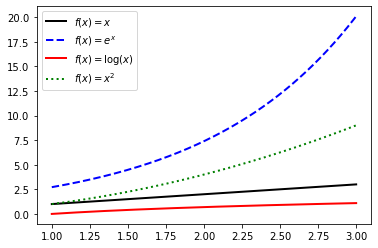

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(1, 3, 1024)

plt.plot(X, X, c = 'k', lw = 2., label = r'$f(x)=x$')
plt.plot(X, np.exp(X), c = 'b', ls = '--', lw = 2., label = r'$f(x)=e^x$')
plt.plot(X, np.log(X), c = 'r', lw = 2., label = r'$f(x)=\log(x)$')
plt.plot(X, X**2, c = 'g', ls = ':', lw = 2., label = r'$f(x)=x^{2}$')

plt.legend()
plt.show()

Now try essentially the same picture over a wider interval:

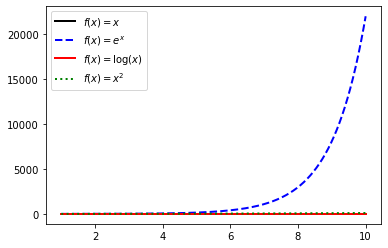

In [83]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(1, 10, 1024)

plt.plot(X, X, c = 'k', lw = 2., label = r'$f(x)=x$')
plt.plot(X, np.exp(X), c = 'b', ls = '--', lw = 2., label = r'$f(x)=e^x$')
plt.plot(X, np.log(X), c = 'r', lw = 2., label = r'$f(x)=\log(x)$')
plt.plot(X, X**2, c = 'g', ls = ':', lw = 2., label = r'$f(x)=x^{2}$')

plt.legend()
plt.show()

Note that $e^{x}$ grows so quickly that visually the differences among the other three functions are obliterated.

One way to deal with this kind of scaling problem is to log scale the y-axis:

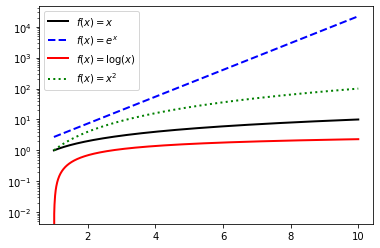

In [84]:
import numpy as np
import matplotlib.pyplot as plt


plt.yscale('log')

X = np.linspace(1, 10, 1024)
plt.plot(X, X, c = 'k', lw = 2., label = r'$f(x)=x$')
plt.plot(X, np.exp(X), c = 'b', ls = '--', lw = 2., label = r'$f(x)=e^x$')
plt.plot(X, np.log(X), c = 'r', lw = 2., label = r'$f(x)=\log(x)$')
plt.plot(X, X**2, c = 'g', ls = ':', lw = 2., label = r'$f(x)=x^{2}$')

plt.legend()
plt.show()

In this picture the exponential function appears grow at a linear rate, while all the
others become "sublinear".

What is going on?  Essentially every value $f(x)$ is mapped to $\log f(x)$ before being 
positioned in the plane.  That goes for the labeled points on the $y$ axis.  The point $10^2$ on the y-axis is positioned twice as far from $10^0$ as $10^1$ is.

## Styles

The `pyplot` package in `mpl` has a number of dufferent styles available.  Here's how to try them out.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

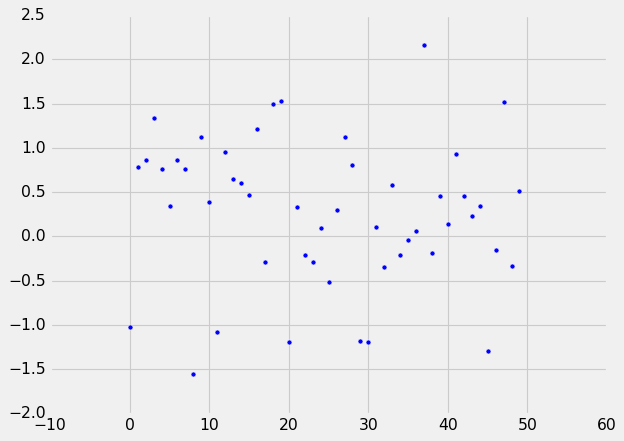

In [11]:
#plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
plt.style.use('fivethirtyeight')
data = np.random.randn(50)
plt.scatter(np.arange(50),data)

To list all available styles, use:

In [8]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


To customize your own style, read up on style parameters in the [Matplotlib style doc page.](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

With a standard module installation structure, these styles are installed under `python3.7/site-ackages/matplotlib`.  For example in the anaconda home directory installation on my Mac, they;re at:

```
/Users/gawron/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib
```

What you can therefore do is insert a custom style file in that directory for future use.

The `mpl-data` directory also contains the default `matplotlib` fonts.

## Periodicity

Text(-1, 6, 'y')

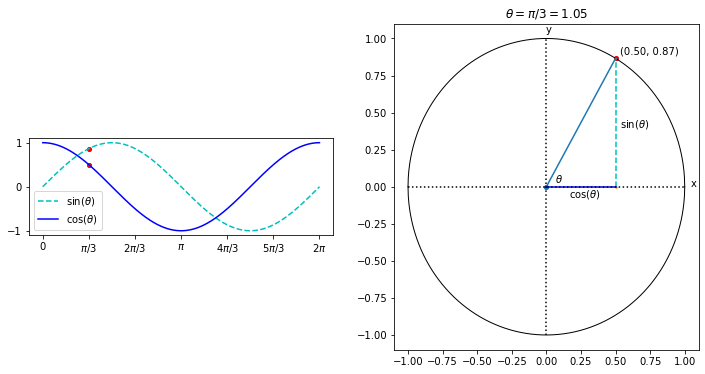

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def relabel_xaxis (ax):
    """
    Put nice radian ticks and tick labels along xaxis of given axes.
    
    This version 0.1, made more ele3gant below.
    """
    ax.set_xticks(np.array([0,np.pi/3, 2 * np.pi/3, np.pi,
                              4* np.pi/3, 5 * np.pi/3, 2 * np.pi,]))
    ax.set_xticklabels(np.array(['0', r'$\pi/3$',  r'$2\pi/3$', r'$\pi$',
                                     r'$4\pi/3$', r'$5\pi/3$', r'$2\pi$',]))    
# The featured point
P = (.5, np.sqrt(3)/2)
sz, pt_col = 17, 'r'

# To tinker with the width ratios of ax[0] and ax[1] 
#f, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [1,1.1]},sharey=True)
f, ax = plt.subplots(1,2)
f.set_figwidth(12),f.set_figheight(6)

################ ax[0] ###############
X = np.linspace(0, 2 * np.pi, 1024)
# Force scale of x and y axis to be the same
# Adjust boxsize of ax[0] to make this happen
ax[0].set_aspect('equal', adjustable='box') 
relabel_xaxis(ax[0])

ax[0].plot(X, np.sin(X), c = 'c', ls = '--', label = r'$\sin (\theta)$')
ax[0].plot(X, np.cos(X), c = 'b', label = r'$\cos (\theta)$')
ax[0].scatter([np.pi/3],P[0],c=pt_col,s=sz)
ax[0].scatter([np.pi/3],P[1],c=pt_col,s=sz)
ax[0].legend()

################ ax[1] ###############
X2 = np.linspace(-1, 1, 1024)
Y2 = np.sqrt(1 - X2**2)
ax[1].set_title(r'$\theta = \pi/3 = {}$'.format(f'{np.pi/3:.2f}'))
ax[1].plot(X2,Y2,c="k",lw=1)  # Top half of unit circle
ax[1].plot(X2,-Y2,c="k",lw=1) # Bottom half of unit circle
ax[1].scatter([0],[0],s=sz) # The origin
ax[1].scatter(*P,s=sz,c=pt_col) # The point P
ax[1].scatter([P[0]], [0],s=2)
ax[1].plot([P[0],P[0]], [0,P[1]],ls='--', c='c') # sin leg
ax[1].plot([0,P[0]],[0,P[1]]) #Hyp
ax[1].plot([0,P[0]],[0,0],c='b') #cos leg

# xy axes
ax[1].plot([-1,1],[0,0],c='k',ls=':')
ax[1].plot([0,0],[-1,1],c='k',ls=':')
### text annotation ax[1]
ax[1].annotate(r'$\sin(\theta)$',(P[0],.4),xytext=(4,0),textcoords='offset points')
ax[1].annotate(r'$\cos(\theta)$',(P[0]/3,0),xytext=(0,-11),textcoords='offset points')
ax[1].annotate(r'$\theta$',(0,0),xytext=(9,4),textcoords='offset points')
ax[1].annotate(f'({P[0]:.2f}, {P[1]:.2f})',(P[0],P[1]),xytext=(4,4),
               textcoords='offset points')
ax[1].annotate('x',(1,0),xytext=(6,0),textcoords='offset points')
ax[1].annotate('y',(0,1),xytext=(-1,6),textcoords='offset points')

The functions $\cos$ and $\sin$ track the $x$ and $y$ coordinates of a point P as
it orbits around the unit circle (the circle with radius 1, shown here centered
at the origin).  These two values are functions of the angle 
$\theta$ as shown in the picture.  

The angle $\theta$ is usually expressed in terms of the distance traveled along the
arc of the circle if the journey  started at (1,0).
One orbit round the circle covers the entire circumference, which
is $2\pi$; 60 degrees is $\frac{1}{6}$ of the way around so 60 degrees equals 
one-sixth of  $2\pi$ or  $\frac{\pi}{3}$. The picture on the right shows the value of 
$\cos$ and $\sin$ for $\frac{\pi}{3}$.

The picture on the left plots the values $\cos$ and $\sin$ for one complete orbit
around the circle, with the values for the point $\frac{\pi}{6}$ shown in red. Note that after one journey around, values will repeat since the orbiting point is returning to locations it previously visited.  So the values of cos and sin for $\frac{\pi}{3}$
will be the same for $2\pi + \frac{\pi}{3}$; $2\pi$ is called the **period**
of these functions and functions that always revisit the same values after a fixed period
are called **periodic**.

## Polar Coordinates

Use **polar coordinates** for better visualization of the symmetries in periodic data.

The two "axes" are the angle and the distance from the origin, known as the $\theta$ ("theta") coordinate and the $\rho$ ("rho") coordinate respectively.

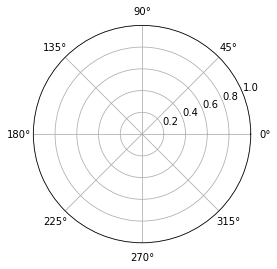

In [200]:
ax = plt.axes(polar = True)

The polar grid above can plot any point in the unit circle.

By default the $\theta$ coordinates are labeled in degrees. 

Below we'll adjust the labels to be radians, for ease of comparison with the plots abpve.

We plot $\sin$ and $\cos$ in polar coordinates.  Note the $\rho$ axis accommodates negative values for $\rho$, since the values of $\sin$ and $\cos$ can vary from -1 to 1.

Some setup code

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def label_fraction (index,num_sectors):
    """
    Returns the latex-ified string appropriate for C{index}
    when dividing 2pi into C{num_sectors} regions.
    
    For example when C{index} = 4 and C{num_sectors} = 12,
    returns latex-ified 2pi/3 string, r'$2\pi/3$'.
    
    num_sectors = 4
    for index in range(num_sectors):
        print(label_fraction (index,num_sectors))
        
    yields
    
    0
    $\pi/2$
    $\pi$
    $3\pi/2$
    """
    if index:
        # Were dividing up 2pi:
        # So this is the arc width in pi units for an appropriate sector;
        # guaranteed to be an integer, since we know num_sectors is even.
        if index == num_sectors:
            # This isnt polar.  We need to render 2pi as a tick
            return '$2\\pi$'
        divisor = int(num_sectors/2)
        gcd = np.gcd(index,divisor)
        index, divisor = int(index/gcd), int(divisor/gcd)
        if divisor == 1: # Since index < num_sectors, only happens when gcd == index
            return '$\\pi$'
        else:
           fac = '' if index == 1 else index
           return f'${fac}\\pi/{divisor}$'
    else:
        return '0'

def relabel_angles (ax, num_sectors=8, fontsize=12, polar = True):
    assert num_sectors%2 == 0, 'num_sectors must be even'
    num_ticks = num_sectors+1
    xT = np.linspace(0, 2*np.pi, num_ticks) 
    if polar:
        xT = xT[:-1] #leaving off 2pi tick
        num_ticks -= 1
    ax.set_xticks(xT)
    #xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    #    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
    xL = [label_fraction(index,num_sectors) for index in range(num_ticks)]
    ax.set_xticklabels(xL, fontdict = {'fontsize': fontsize})

def relabel_xaxis (ax,num_sectors = 6):
    """
    Put nice radian ticks and tick labels along xaxis of given axes.
    """
    relabel_angles (ax, num_sectors=num_sectors, polar = False)

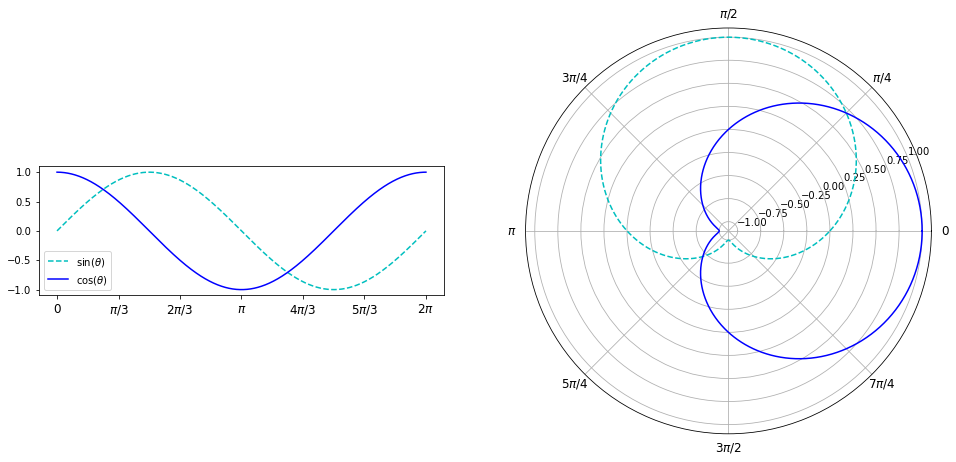

In [66]:
f = plt.figure(figsize=(16,8))
#f.set_figwidth(12),f.set_figheight(6)
#  1 row, 2 cols, ax0 is the first plot in the first row
ax0 = plt.subplot(121) 
#  1 row, 2 cols, ax1 is the second plot in the first row and it's polar
ax1 = plt.subplot(122, projection='polar')
ax = [ax0, ax1]

################ ax[1] (polar axis) ###############
thetas = np.linspace(0 , 2 * np.pi, 1024)
# Default
num_sectors = 8
#num_sectors = 12
relabel_angles (ax[1], num_sectors=num_sectors)

ax[1].plot(thetas, np.sin(thetas), c= 'c', ls = '--', label=r'$\sin(x)$')
ax[1].plot(thetas, np.cos(thetas), c= 'b', label=r'$\cos(x)$')
#ax[1].legend()

################ ax[0] ###############
#X = np.linspace(0, 2 * np.pi, 1024)
# Force scale of x and y axis to be the same
# Adjust boxsize of ax[0] to make this happen
ax[0].set_aspect('equal', adjustable='box') 
relabel_xaxis(ax[0])

# The polotting commands are identical to those for ax[1]
ax[0].plot(thetas, np.sin(thetas), c = 'c', ls = '--', label = r'$\sin (\theta)$')
ax[0].plot(thetas, np.cos(thetas), c = 'b', label = r'$\cos (\theta)$')

#ax[0].scatter([np.pi/3],P[0],c=pt_col,s=sz)
#ax[0].scatter([np.pi/3],P[1],c=pt_col,s=sz)
ax[0].legend()

#plt.show()

The kidney bean curve we're looking is called a cardiod.  

We can show the same curves on a standard polar plot with no negative $\rho$ values
by adding 1 to the value of $\cos \theta$ and $\sin \theta$.  
This means the $\rho$ axis  can be centered on 0.

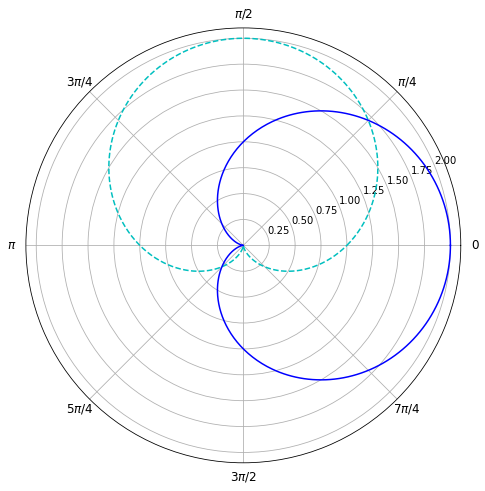

In [121]:
f = plt.figure(figsize=(8,8))
ax = plt.axes(projection='polar')
thetas = np.linspace(0 , 2* np.pi, 512)
# Default
num_sectors = 8
#num_sectors = 12
relabel_angles (ax, num_sectors=num_sectors)

ax.plot(thetas, 1 + np.sin(thetas), c= 'c', ls = '--', label=r'$\sin(x)$')
ax.plot(thetas, 1 + np.cos(thetas), c= 'b', label=r'$1 -\cos(x)$')
#ax[1].legend()

We can also plot $\cos\theta$ on a standard polar plot with 0 at the
center.  We avoid negative values  by only plotting
$\cos\theta$ in the interval where it's positive.  The result is surprising.

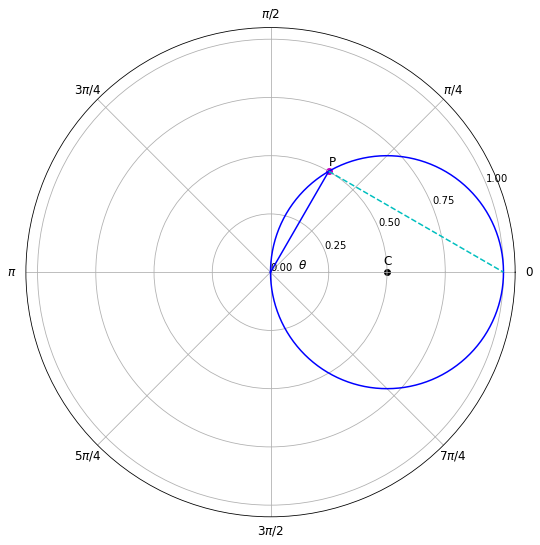

In [131]:
f = plt.figure(figsize=(9,9))
ax = plt.axes(projection='polar')
cthetas = np.linspace(-np.pi/2 , np.pi/2, 512)

# Default
num_sectors = 8
#num_sectors = 12
relabel_angles (ax, num_sectors=num_sectors)

#ax.plot(thetas, np.sin(thetas), c= 'c', ls = '--', label=r'$\sin(x)$')
#ax.plot(thetas, abs(np.cos(thetas)), c= 'b', label=r'$\cos(x)$')
# The cosine circle
ax.plot(cthetas, np.cos(cthetas), c= 'b', label=r'$\cos(x)$')

theta0 = np.pi/3
thetas2 = np.empty((200,))
thetas2.fill(theta0)
costheta0 = np.cos(theta0)
rhos2 = np.linspace(0,costheta0,200)
# Line from the origin to P
ax.plot(thetas2,rhos2,c='b')
phi_ticks = np.linspace(0,1.0,5)
ax.set_yticks(phi_ticks)
# Angle drops from theta0 to 0 for last dashed line
phis = np.linspace(theta0,0,200)
# The length of lines connecting the origin and points on the dashed line
# as a function of phi, their angle.  The length rho_prime varies according to
# cos(theta0 - phi) * pho_prime = costheta0
def rho_prime (phi):
    return costheta0/np.cos(theta0 - phi)
rhos3 = rho_prime(phis)
# Line from P to (theta = 0, rho=1), completing right triangle
ax.plot(phis,rhos3,c='c', ls='--')
# The point P
ax.scatter([theta0],[costheta0],s=35,c='m')
# The point C
ax.scatter([0],[.5],s=35,c='k')
ax.annotate('P',(theta0,costheta0),xytext=(0,6),textcoords='offset points',fontsize=12)
ax.annotate('C',(0,.5),xytext=(-4,8),textcoords='offset points',fontsize=12)
text = ax.annotate(r'$\theta$',(0,.01),xytext=(25,4),textcoords='offset points',fontsize=12)

The plot of $\cos(\theta)$ is a circle centered at $(\theta=0,\rho=.5)$, shown as C.

The length of a line connecting the origin with a point P on the circle 
is $\cos (\theta )$,
since the right triangle inscribed in the circle has a hypotenuse of length 1.  This shows
that any point on the circle has polar coordinate $(\theta, \cos (\theta ))$; that is, the circle is precisely the polar plot of $\cos(\theta)$.

The same plot as above with $\sin$ added, plotted over the set of
$\theta$s where $\sin$ is positive.

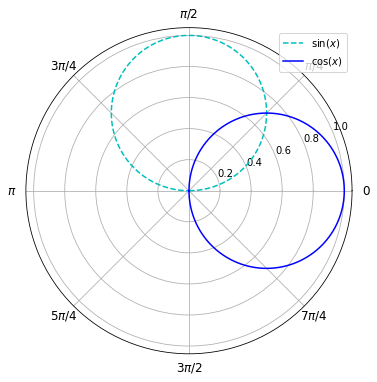

In [134]:
f = plt.figure(figsize=(6,6))
ax = plt.axes(projection='polar')
cthetas = np.linspace(-np.pi/2 , np.pi/2, 512)
sthetas = np.linspace(0 , np.pi, 512)

# Default
num_sectors = 8
#num_sectors = 12
relabel_angles (ax, num_sectors=num_sectors)

#The sin circle
ax.plot(sthetas, np.sin(sthetas), c= 'c', ls='--', label=r'$\sin(x)$')
# The cosine circle
ax.plot(cthetas, np.cos(cthetas), c= 'b', label=r'$\cos(x)$')
leg = ax.legend()

In [129]:
#import numpy as np
#import matplotlib.pyplot as plt

#plt.figure(figsize=(9,9))
#thetas = np.linspace(0 , 2 * np.pi, 1024)
#theta0 = np.array([np.pi/4 for i in range(1024)])
#rho0 = np.linspace(-1, np.sin(np.pi/4), 1024)
#ax = plt.axes(polar = True)
#relabel_angles (ax)

#plt.plot(thetas, np.sin(thetas), c= 'c', ls = '--', label=r'$\sin(x)$')
#plt.plot(thetas, np.cos(thetas), c= 'b', label=r'$\cos(x)$')
#plt.plot(theta0, rho0, c= 'k')
# Plotting a non periodic function
#T2 = np.linspace(-np.pi/4 , np.pi/4, 1024)
#plt.plot(T2, T2**2, c= 'k')

#plt.legend()
#plt.show()

The next two pictures show more complicated linear combinations of $\cos$ and $\sin$.

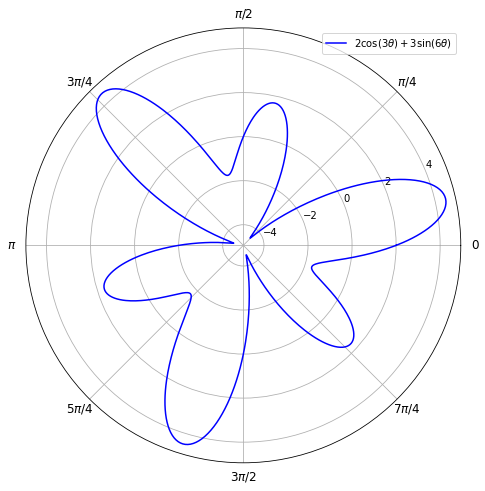

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
thetas = np.linspace(0 , 2 * np.pi, 1024)
ax = plt.axes(polar = True)
relabel_angles (ax)
#Butterfly
#plt.plot(T, np.cos(4*thetas) + np.sin(6*thetas), c= 'r', label=r'$6\sin(6\theta)$')
rhos = 2*np.cos(3*thetas) + 3*np.sin(6*thetas)
plt.plot(thetas, rhos, c= 'b', label=r'$2\cos(3\theta) + 3\sin(6\theta)$')
plt.legend()
plt.show()

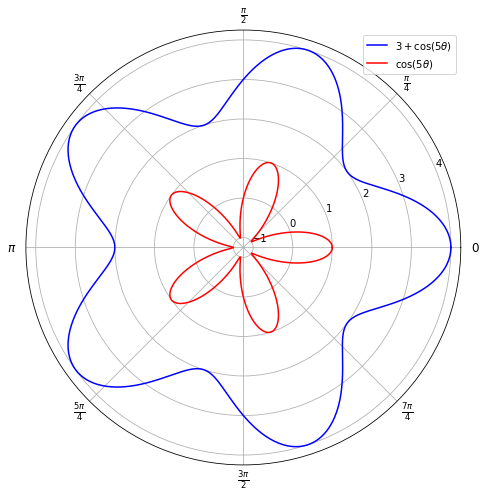

In [218]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
thetas = np.linspace(0 , 2 * np.pi, 1024)
ax = plt.axes(polar = True)
relabel_angles (ax)
#Butterfly
#plt.plot(thetas, np.cos(4*thetas) + np.sin(6*thetas), c= 'r', label=r'$6\sin(6\theta)$')
#rhos = 2*np.cos(3*thetas) + 3*np.sin(6*thetas)
rhos=3+np.cos(5*thetas)
plt.plot(thetas, rhos, c= 'b', label=r'$3 + \cos(5\theta)$')
rhos2=np.cos(5*thetas)
plt.plot(thetas, rhos2, c= 'r', label=r'$\cos(5\theta)$')
#plt.plot(thetas, 1. + .25 * np.sin(16 * thetas), c= 'k')
plt.legend()
plt.show()


## Lemniscates

In [ ]:
#𝑟^2 = 𝑎^2 cos2𝜃
#https://openstax.org/books/algebra-and-trigonometry/pages/10-4-polar-coordinates-graphs